In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder



In [5]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\PC\Documents\DOCUMENTS\Data_Science_Resources\IRIS.csv'  
data = pd.read_csv(file_path, encoding='latin1')


In [12]:
# encoding the species column into numeric labels
encoder = LabelEncoder()
data['species_encoded'] = encoder.fit_transform(data['species'])


In [13]:
# seperating features and targets
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species_encoded']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# make predictions on the test set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=encoder.classes_)

In [18]:
# Print evaluation results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(report)

Model Accuracy: 100.00%

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



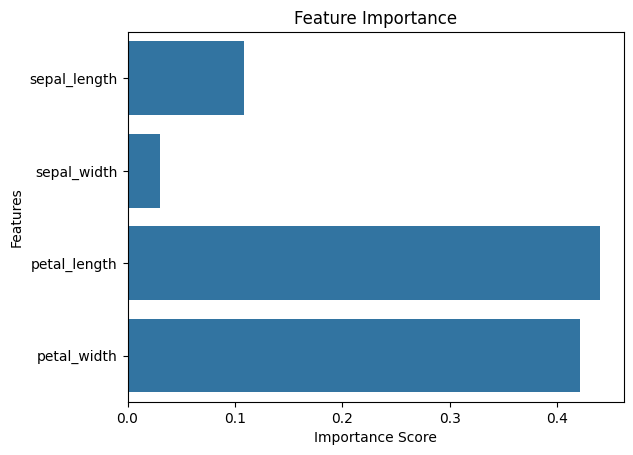

In [19]:
# Visualize feature importance
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [20]:
# Save the trained model
import joblib
model_file = 'iris_random_forest_model.pkl'
joblib.dump(model, model_file)
print(f"Trained model saved as {model_file}")

Trained model saved as iris_random_forest_model.pkl


In [21]:
# Load the model for future use
loaded_model = joblib.load(model_file)
print("Model successfully loaded for future use.")

Model successfully loaded for future use.
